In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import matplotlib.lines as mlines



%matplotlib inline

In [2]:
# Make sure you read postal codes as strings, otherwise 
# the postal code 01110 will be parsed as the number 1110. 
plz_shape_df = gpd.read_file('Data/plz-gebiete.shp', dtype={'plz': str})
plz_shape_df.head()

# The geometry column contains the polygons which define the postal code’s shape.

,plz,note,geometry
0,52538,"52538 Gangelt, Selfkant","POLYGON ((5.86632 51.05110, 5.86692 51.05124, ..."
1,47559,47559 Kranenburg,"POLYGON ((5.94504 51.82354, 5.94580 51.82409, ..."
2,52525,"52525 Waldfeucht, Heinsberg","POLYGON ((5.96811 51.05556, 5.96951 51.05660, ..."
3,52074,52074 Aachen,"POLYGON ((5.97486 50.79804, 5.97495 50.79809, ..."
4,52531,52531 Ãbach-Palenberg,"POLYGON ((6.01507 50.94788, 6.03854 50.93561, ..."


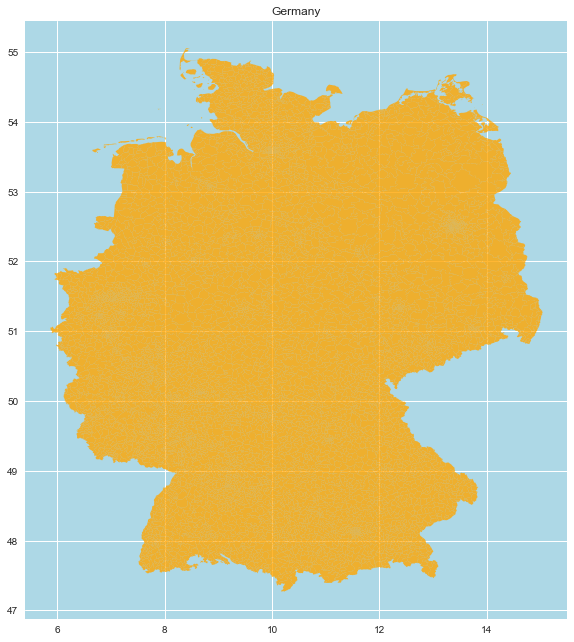

In [3]:
# We can use geopandas mapping tools to generate the map with the plot method.
plt.rcParams['figure.figsize'] = [16, 11]

fig, ax = plt.subplots()

plz_shape_df.plot(ax=ax, color='orange', alpha=0.8)
ax.set(
    title='Germany', 
    aspect=1.3, 
    facecolor='lightblue'
);

In [4]:
wind_df_to_map = pd.read_csv('data/windmodel_std_prediction_addedinfo.csv')
print(wind_df_to_map.head(10))
wind_df_to_map.info()

## Zeile 54 Station 20210 muss gelöscht werden aus csv, da falsche Koordinaten

      id      temp      dwpt       rhum      prcp       pres  \
0  10004  4.981220  5.196373   9.593349  0.235319  11.151602   
1  10007  5.154724  5.288078   9.580470  0.329530  10.939160   
2  10015  5.556035  5.470658  10.540065  0.510561  10.884106   
3  10018  6.047454  5.293728  12.864473  0.280002  11.001274   
4  10020  6.223732  5.514511  13.248548  0.395966  11.076823   
5  10022  6.622493  5.567995  14.854049  0.462593  10.860209   
6  10026  6.317278  5.329260  13.631997  0.302733  10.699982   
7  10028  6.534259  5.556742  13.664881  0.436688  10.782026   
8  10033  6.501500  5.721822  14.606937  0.297183  10.779683   
9  10034  6.322220  5.282954  13.387978  0.460480  10.750109   

   prediction_suitable               location region  \
0                    1     (54.1667, 6.35, 0)     HH   
1                    1   (54.1833, 7.4333, 0)     HH   
2                    1      (54.1833, 7.9, 4)     SH   
3                    1    (54.9167, 8.35, 16)     SH   
4              

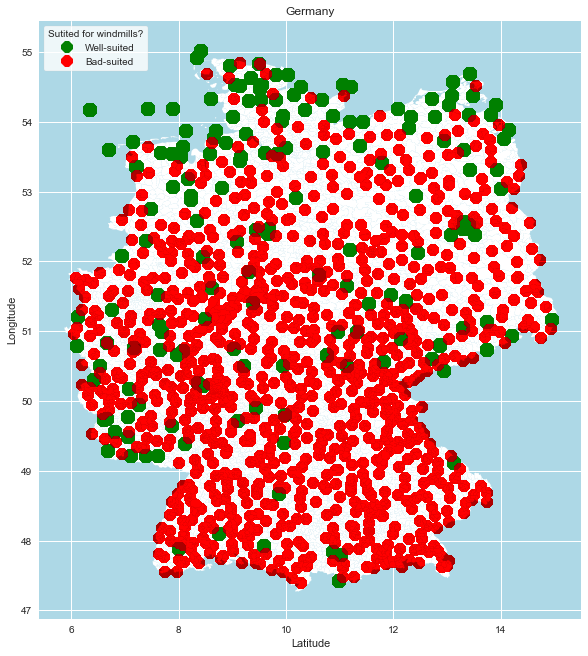

In [12]:
# Plot stations in different colours, depending on the "suitable for PV"
plt.rcParams['figure.figsize'] = [16, 11]

fig, ax = plt.subplots()

plz_shape_df.plot(
    ax=ax, 
    color='white', 
    alpha= 1
)


for value in wind_df_to_map["prediction_suitable"]:
    if value == 0:
        # create temporary table, filter table df by conditions
        temp_table = wind_df_to_map[wind_df_to_map["prediction_suitable"]==0]
        # Plot city location centroid for bad suited stations in red
        bad_suited =ax.plot(
            temp_table["longitude"], #longitude
            temp_table["latitude"], #latitude
            marker='8',
            markersize = 12,
            c='red', 
            alpha= 0.01 ,
            linestyle="None" 
        )
        
    elif value == 1:
        temp_table = wind_df_to_map[wind_df_to_map["prediction_suitable"]==1]
        # Plot city location centroid for medium suited stations in orange
        mid_suited =ax.plot(
            temp_table["longitude"], #longitude
            temp_table["latitude"], #latitude 
            marker='8',
            markersize = 15,
            c='green', 
            alpha=0.01,
            linestyle="None" 
        )

                
ax.set(
    title='Germany',
    xlabel = 'Latitude',
    ylabel = 'Longitude',
    aspect=1.3, 
    facecolor='lightblue'
)

green_line = mlines.Line2D([], [], color='green', marker='8',
                          markersize=13, label='Well-suited',linestyle="None")
red_line = mlines.Line2D([], [], color='red', marker='8',
                          markersize=13, label='Bad-suited',linestyle="None")


plt.legend(handles=[green_line, red_line],
           title = 'Sutited for windmills?',
           facecolor = 'white',
           loc = 'upper left',
           fontsize = 'medium', 
           frameon = True 
           )
